No questions! Excited to use more of these algorithms

## 15.5 (Using TSNE to Visualize the Digits Dataset in 3D)  
In Section 15.6, you visualized the Digits dataset’s clusters in two dimensions. In this exercise, you’ll create a 3D scatter plot using TSNE and Matplotlib’s Axes3D, which provides x-, y- and z-axes for plotting in three dimensions. To do so, load the Digits dataset, create a TSNE estimator that reduces data to three dimensions and call the estimator’s fit_transform method to reduce the dataset’s dimensions. Store the result in reduced_data. Next, execute the following code: 
```python
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(9, 9))

axes = figure.add_subplot(111, projection='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1],
    zs=reduced_data[:, 2], c=digits.target,
    cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
```

The preceding code imports Axes3D, creates a Figure and calls its add_subplot method to get an Axes3D object for creating a three-dimensional graph. In the call to the Axes3D scatter method, the keyword arguments xs, ys and zs specify one-dimensional arrays of values to plot along the x-, y- and z-axes. Once the graph is displayed, be sure to drag the mouse on the image to rotate it left, right, up and down so you can see the clusters from various angles. The following images show the initial 3D graph and two rotated views:

In [203]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

digits = load_digits()
tsne = TSNE(n_components=3, random_state=11)
reduced_data = tsne.fit_transform(digits.data)
reduced_data.shape

(1797, 3)

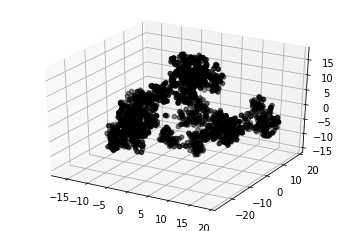

In [205]:
axes = plt.figure().add_subplot(projection='3d')
dots = axes.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
    c='black')

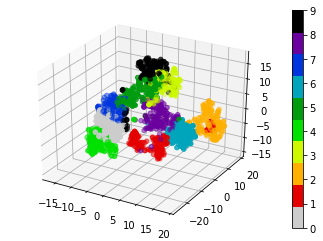

In [207]:
axes = plt.figure().add_subplot(projection='3d')
dots = axes.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
    c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
colorbar = plt.colorbar(dots)

## 15.17 (Binary Classification with the Breast Cancer Dataset)  
Check out the Breast Cancer Wisconsin Diagnostic dataset that’s bundled with scikit-learn
https://scikit-learn.org/stable/datasets/index.html#breast-cancerdataset
The dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is commonly used to perform binary classification. Using this dataset, reimplement the steps of this chapter’s classification case study in Sections 15.2–15.3. Use the GaussianNB (short for Gaussian Naive Bayes) estimator. When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a LogisticRegression classifier in the estimators dictionary. Logistic regression is another popular algorithm for binary classification.

In [209]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [211]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [213]:
breast_cancer.target[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [215]:
breast_cancer.data.shape

(569, 30)

In [217]:
breast_cancer.target.shape

(569,)

In [219]:
breast_cancer.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, random_state=11)

In [223]:
X_train.shape

(426, 30)

In [225]:
X_test.shape

(143, 30)

In [227]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()

In [229]:
gaus.fit(X_train, y_train)
predicted = gaus.predict(X_test)
expected = y_test

In [231]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [233]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [235]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]

In [237]:
print(f'{gaus.score(X_test, y_test):.2%}')

95.10%


In [239]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[44,  6],
       [ 1, 92]])

In [241]:
from sklearn.metrics import classification_report
names = [str(digit) for digit in breast_cancer.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



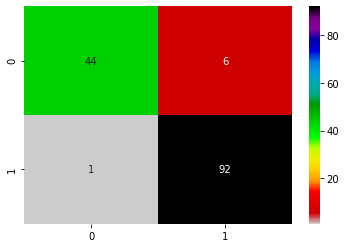

In [243]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [245]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=2, random_state=11, shuffle=True)
scores = cross_val_score(estimator=gaus, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

scores

array([0.94035088, 0.94014085])

In [247]:
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 94.02%
Accuracy standard deviation: 0.01%


In [249]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

estimators = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'),
    'GaussianNB': gaus,
    'LogisticRegression': LogisticRegression()}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=2, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=93.32%; standard deviation=0.34%
                 SVC: mean accuracy=91.21%; standard deviation=0.34%
          GaussianNB: mean accuracy=94.02%; standard deviation=0.01%
  LogisticRegression: mean accuracy=94.02%; standard deviation=1.06%


GaussianNB and LogisticRegression have the same accuracy, but considering the lower standard deviation with GaussianNB, it appears to be the more reliable choice.

In [251]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=91.39%; standard deviation=2.76%
k=3 ; mean accuracy=92.97%; standard deviation=1.56%
k=5 ; mean accuracy=92.79%; standard deviation=2.01%
k=7 ; mean accuracy=93.32%; standard deviation=2.19%
k=9 ; mean accuracy=93.50%; standard deviation=2.72%
k=11; mean accuracy=92.97%; standard deviation=3.03%
k=13; mean accuracy=93.32%; standard deviation=3.21%
k=15; mean accuracy=92.80%; standard deviation=3.71%
k=17; mean accuracy=92.62%; standard deviation=3.66%
k=19; mean accuracy=92.79%; standard deviation=3.37%


We can see the best number of K's is 9